## Q. How to prepare data for prediction?

This model takes last 15 days datapoints with features('Open', 'High', 'Low', 'Last', 'Close', 'Volume') i.e. shape of datapints is (Batch_size, 15, 6). This model predicts the closing price for next 3 days i.e. output shape is (Batch_Size, 3). 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
%matplotlib inline

In [ ]:
print(tf.__version__) # Tensorfow version

2.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## For Axis Bank data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/nifty_50/AXISBANK.csv')
print(df.shape)
df.head()

(5097, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5092,2020-06-24,AXISBANK,EQ,443.65,448.0,448.50,422.20,425.4,424.65,435.17,33577340,1.461173e+15,304342.0,5848920.0,0.1742
5093,2020-06-25,AXISBANK,EQ,424.65,419.0,428.70,410.35,418.9,421.70,420.13,49854504,2.094542e+15,356209.0,11216077.0,0.2250
5094,2020-06-26,AXISBANK,EQ,421.70,426.0,428.75,418.00,426.0,424.85,422.80,32611425,1.378815e+15,233244.0,6855248.0,0.2102
5095,2020-06-29,AXISBANK,EQ,424.85,415.0,415.80,402.35,404.9,404.80,406.79,36320111,1.477448e+15,333423.0,10059151.0,0.2770
5096,2020-06-30,AXISBANK,EQ,404.80,410.0,414.80,404.05,407.3,406.65,409.15,26951992,1.102744e+15,233118.0,4422649.0,0.1641


In [ ]:
select_columns = ['Open', 'High', 'Low', 'Last', 'Close', 'Volume']

In [ ]:
data1 = df[select_columns]
print(data1.shape)

(5097, 6)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5097 non-null   float64
 1   High    5097 non-null   float64
 2   Low     5097 non-null   float64
 3   Last    5097 non-null   float64
 4   Close   5097 non-null   float64
 5   Volume  5097 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 239.0 KB


In [ ]:
mean_values = np.array([1.33381041e+03, 1.35349217e+03, 1.31268661e+03, 1.33247388e+03, 1.33265177e+03, 2.46374683e+06])
std_values = np.array([2.71460432e+03, 2.75084101e+03, 2.67393726e+03, 2.71059268e+03, 2.71136302e+03, 5.66408295e+06])

In [ ]:
data1 = data1.values
data1 = (data1 - mean_values)/std_values

## Prepare dataset for time series model.

In [ ]:
def prepare_data(dataset, target, start_index, end_index, history_size,
                      target_size):
  Data = []
  Labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i) 
    Data.append(dataset[indices])

    Labels.append(target[i:i+target_size]) 

  return np.array(Data), np.array(Labels)

In [ ]:
x_test1, y_test1 = prepare_data(data1, data1[:, 4], 0, None, 15, 3)

## Load pretrained model.

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/NIFTY50_Models/nifty50_30_model')

In [ ]:
score = model.evaluate(x_test1, y_test1, steps=50)
print('Mean Absoluate Error =',np.round(score, 4))

50/50 [==============================] - 1s 23ms/step - loss: 2.6381e-04
Mean Absoluate Error = 0.0003


In [ ]:
m = tf.keras.metrics.RootMeanSquaredError()
_ = m.update_state(y_test1, model.predict(x_test1))
m.result().numpy()

0.016242342

##### Mean Absoluate Error for Axis bank data is fairly good

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
#plotting function
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  plt.grid()
  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out), np.array(true_future), 'go',
           label='True Closing Prices')
  if prediction.any():
    plt.plot(np.arange(num_out), np.array(prediction), 'ro',
             label='Predicted Closing Prices')
  plt.legend(loc='upper left')
  plt.show()

## Plot the predicted and actual closing price for some random datapoint .

Actual price =[265.9  271.25 279.65], Predicted Price =[271.23 268.19 273.52]


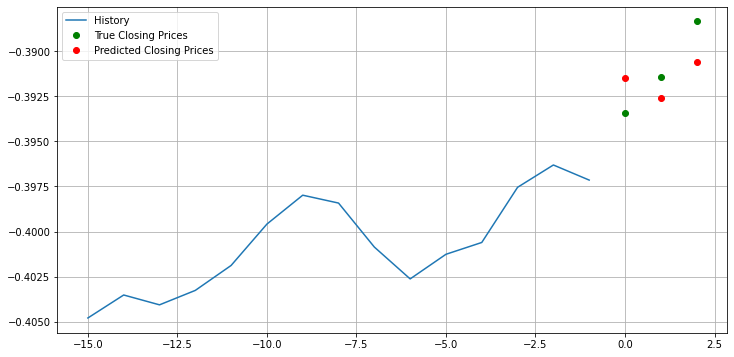

Actual price =[1909.2  1918.85 1920.05], Predicted Price =[1941.17 1940.84 1936.48]


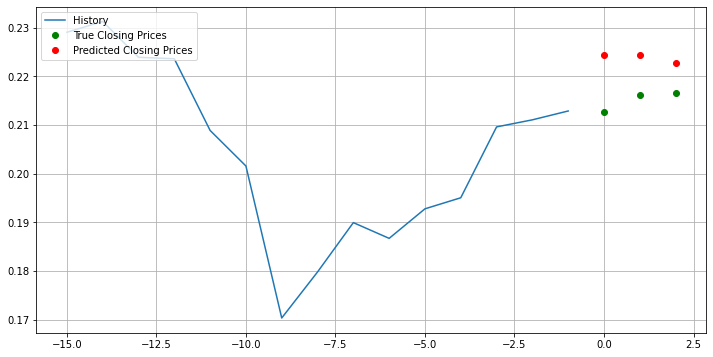

Actual price =[492.85 496.6  494.  ], Predicted Price =[514.22 512.75 515.51]


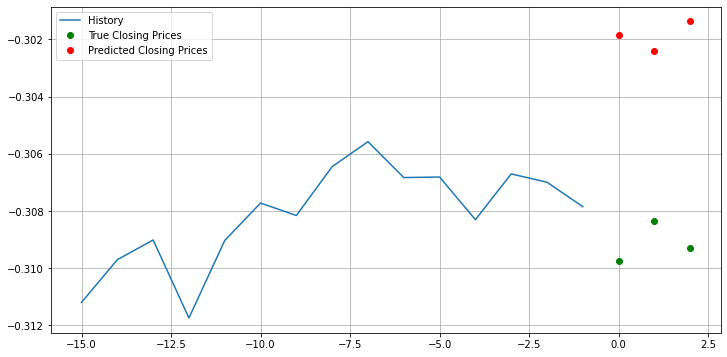

Actual price =[1505.3 1510.4 1536.6], Predicted Price =[1515.15 1514.   1512.31]


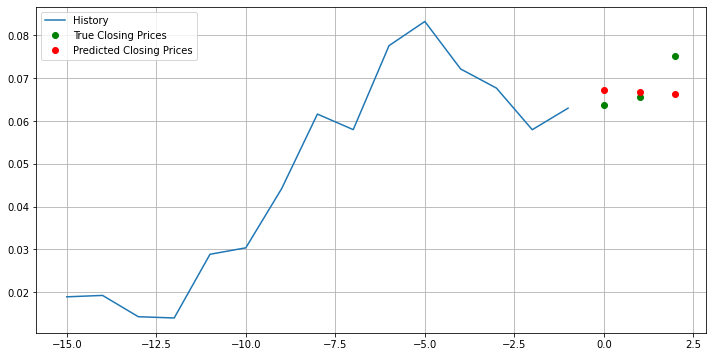

Actual price =[644.8  645.75 649.7 ], Predicted Price =[644.88 641.42 645.67]


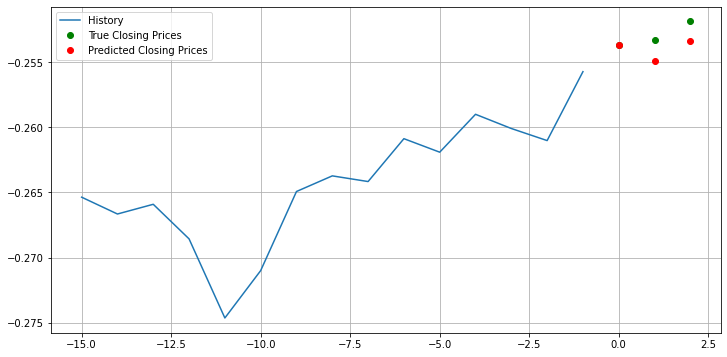

Actual price =[1367.8  1326.95 1323.95], Predicted Price =[1370.95 1368.79 1368.95]


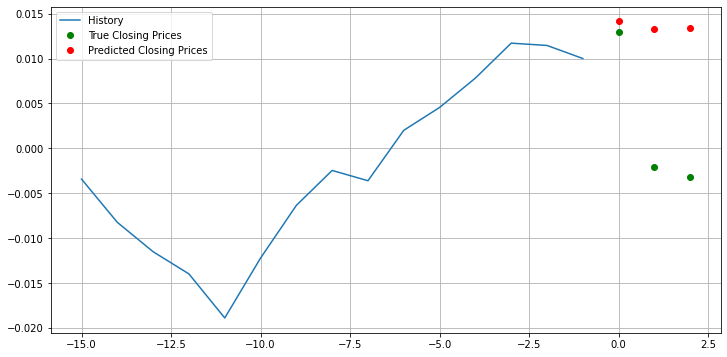

Actual price =[483.   483.   464.95], Predicted Price =[503.13 500.03 504.67]


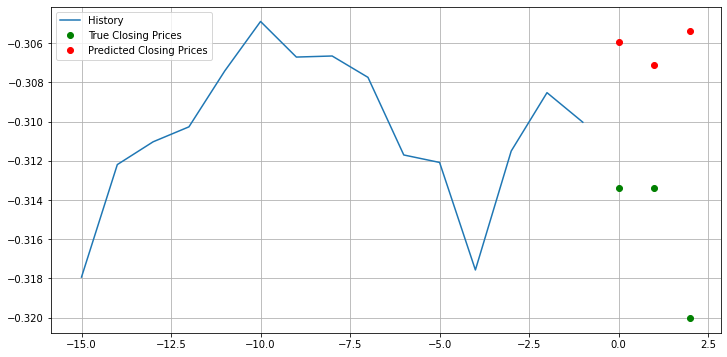

Actual price =[1346.7  1352.8  1339.85], Predicted Price =[1394.31 1392.61 1392.06]


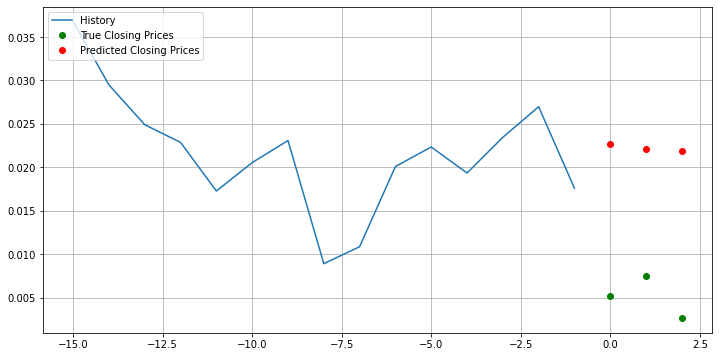

Actual price =[162.15 158.55 159.15], Predicted Price =[179.26 176.34 181.64]


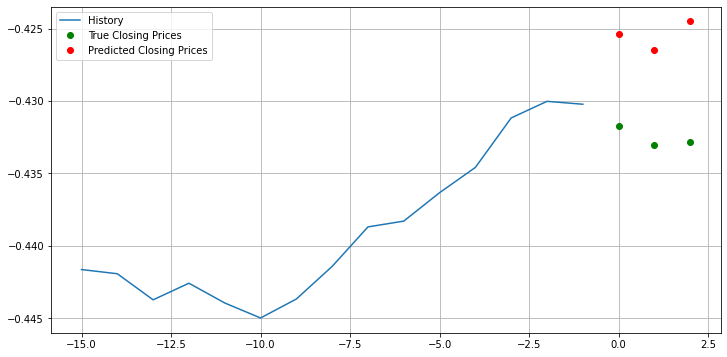

Actual price =[584.45 635.45 685.6 ], Predicted Price =[602.31 599.06 601.88]


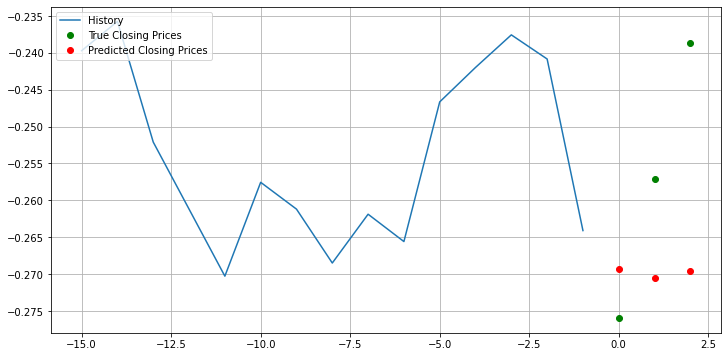

In [ ]:
idx =np.random.randint(0,5080,10)
for x, y in zip(x_test1[idx], y_test1[idx]):
  pred = model.predict(x.reshape(1,15,6))[0]
  actual_price = np.round((y*std_values[4]) + mean_values[4] , 2)
  predicted_price = np.round((pred*std_values[4]) + mean_values[4] , 2)
  print('Actual price ={}, Predicted Price ={}'.format(actual_price, predicted_price))
  multi_step_plot(x, y, pred)

## Prediction and evaluation for TataMotors data.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/nifty_50/TATAMOTORS.csv')
print(df.shape)
df.head()

(5097, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [ ]:
data2 = df[select_columns]
print(data2.shape)

(5097, 6)


In [ ]:
data2 = data2.values
data2 = (data2 - mean_values)/std_values

In [ ]:
x_test2, y_test2 = prepare_data(data2, data2[:, 4], 0, None, 15, 3)

In [ ]:
score = model.evaluate(x_test2, y_test2, steps=50)
print('Mean Absolute Error =',np.round(score,4))

50/50 [==============================] - 1s 22ms/step - loss: 1.4439e-04
Mean Absolute Error = 0.0001


In [ ]:
m = tf.keras.metrics.RootMeanSquaredError()
_ = m.update_state(y_test2, model.predict(x_test2))
m.result().numpy()

0.01201633

##### The mean absoluate error for TataMotors data is fairly good.

## Plot the actual and predicted closing price.

Actual price =[318.2  318.85 318.55], Predicted Price =[330.72 329.18 327.49]


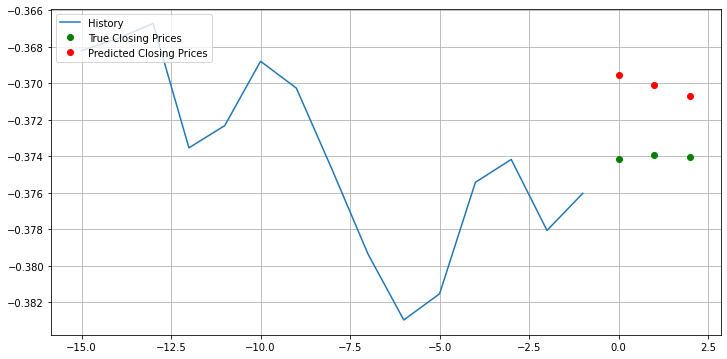

Actual price =[214.3  207.3  209.45], Predicted Price =[251.17 239.74 233.86]


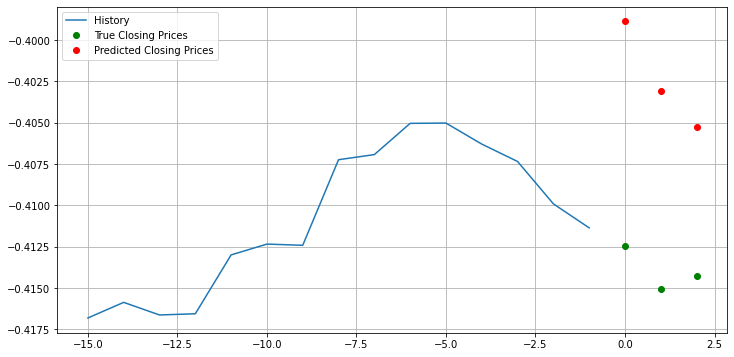

Actual price =[825.5  828.55 810.4 ], Predicted Price =[835.17 832.5  835.44]


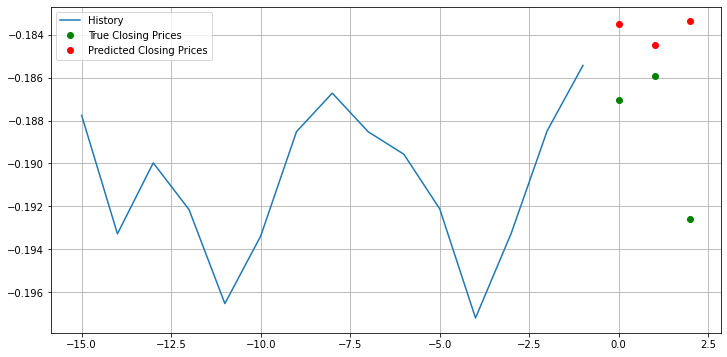

Actual price =[243.75 248.4  246.45], Predicted Price =[282.53 281.28 280.23]


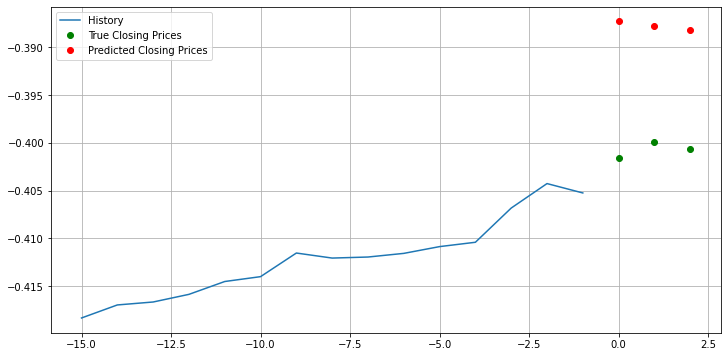

Actual price =[703.15 711.5  709.85], Predicted Price =[695.33 693.59 696.17]


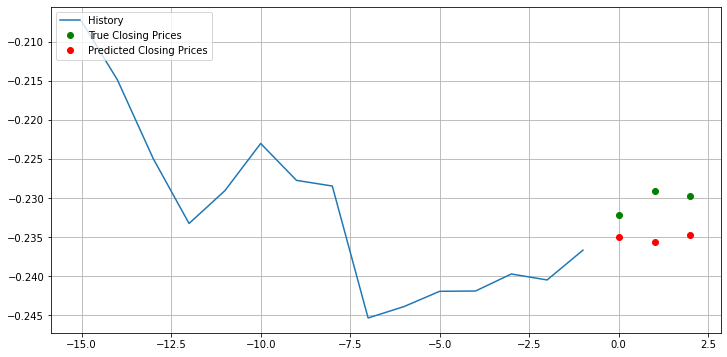

Actual price =[68.15 71.05 67.95], Predicted Price =[47.12 21.73 21.71]


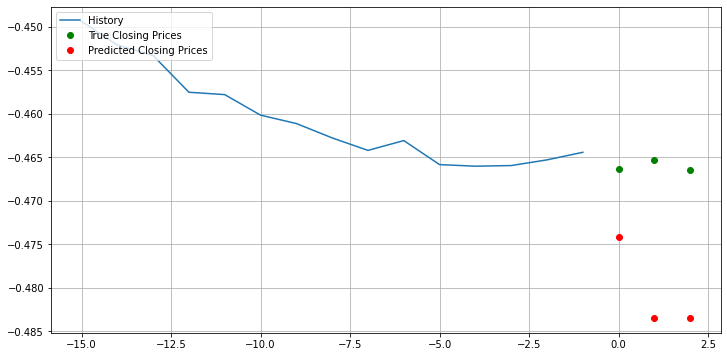

Actual price =[752.55 719.6  716.45], Predicted Price =[797.43 794.73 797.87]


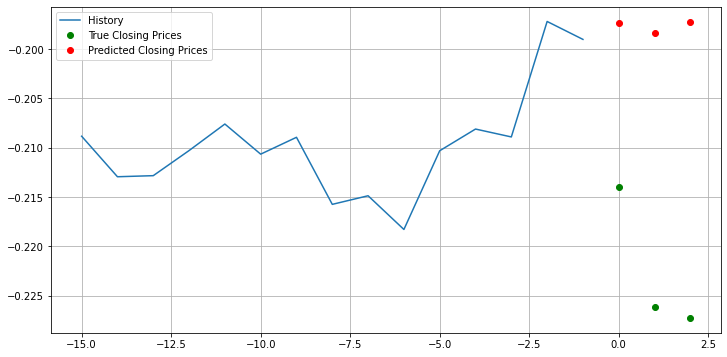

Actual price =[303.8  317.05 313.3 ], Predicted Price =[314.89 314.26 316.38]


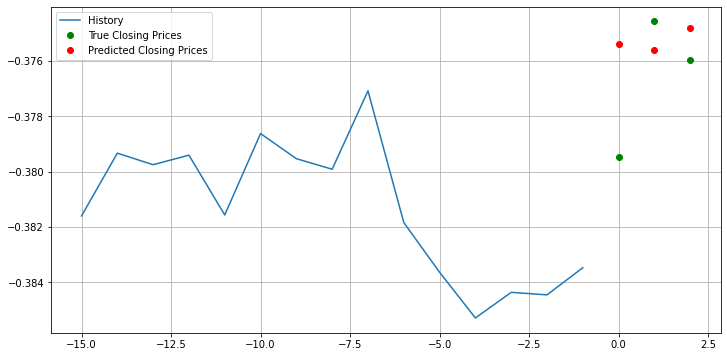

Actual price =[323.6  310.1  310.25], Predicted Price =[355.14 354.3  355.43]


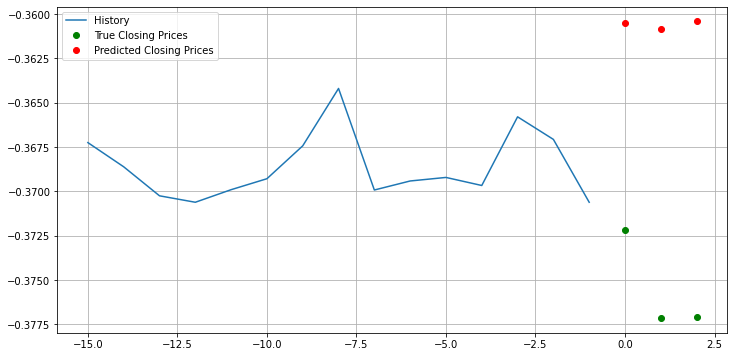

Actual price =[162.9  161.15 160.9 ], Predicted Price =[181.22 178.59 183.69]


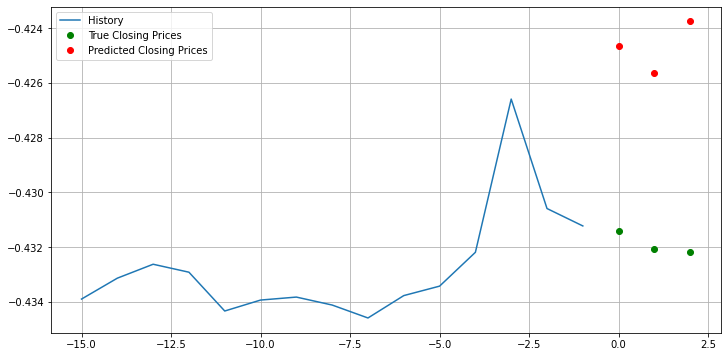

In [ ]:
idx =np.random.randint(0,5080,10)
for x, y in zip(x_test2[idx], y_test2[idx]):
  pred = model.predict(x.reshape(1,15,6))[0]
  actual_price = np.round((y*std_values[4]) + mean_values[4] , 2)
  predicted_price = np.round((pred*std_values[4]) + mean_values[4] , 2)
  print('Actual price ={}, Predicted Price ={}'.format(actual_price, predicted_price))
  multi_step_plot(x, y, pred)

## Evaluation & Prediction for Britannia data.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/nifty_50/BRITANNIA.csv')
print(df.shape)
df.head()

(4831, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-05-11,BRITANNIA,EQ,590.15,584.0,609.95,551.50,609.95,593.80,581.55,15755,9.162305e+11,NaN,NaN,NaN
1,2000-05-12,BRITANNIA,EQ,593.80,595.0,600.00,565.00,571.00,570.15,579.58,14842,8.602167e+11,NaN,NaN,NaN
2,2000-05-15,BRITANNIA,EQ,570.15,555.0,558.00,525.05,541.00,540.15,540.77,20010,1.082088e+12,NaN,NaN,NaN
3,2000-05-16,BRITANNIA,EQ,540.15,531.0,545.00,505.15,516.00,515.90,534.61,28934,1.546848e+12,NaN,NaN,NaN
4,2000-05-17,BRITANNIA,EQ,515.90,530.0,540.00,488.00,513.75,512.00,507.46,24727,1.254802e+12,NaN,NaN,NaN


In [ ]:
data3 = df[select_columns]
data3 = data3.values
data3 = (data3 - mean_values)/std_values
print(data3.shape)

(4831, 6)


In [ ]:
x_test3, y_test3 = prepare_data(data3, data3[:, 4], 0, None, 15, 3)

In [ ]:
score = model.evaluate(x_test3, y_test3, steps=50)
print('Mean Absolute Error =',np.round(score,4))

50/50 [==============================] - 1s 22ms/step - loss: 0.0010
Mean Absolute Error = 0.001


In [ ]:
m = tf.keras.metrics.RootMeanSquaredError()
_ = m.update_state(y_test3, model.predict(x_test3))
m.result().numpy()

0.03204632

Actual price =[6736.75 6565.85 6344.05], Predicted Price =[6587.22 6520.67 6517.24]


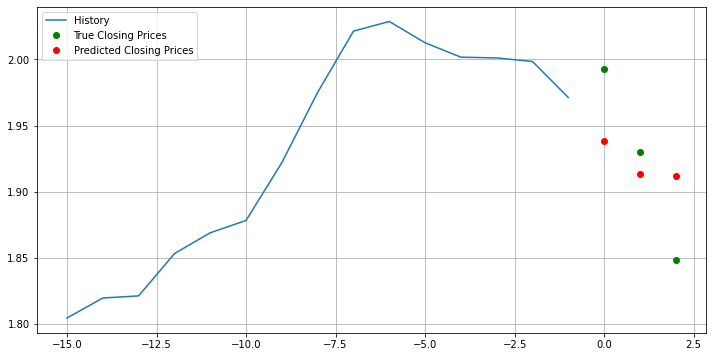

Actual price =[1496.3  1513.15 1524.25], Predicted Price =[1500.21 1498.81 1498.29]


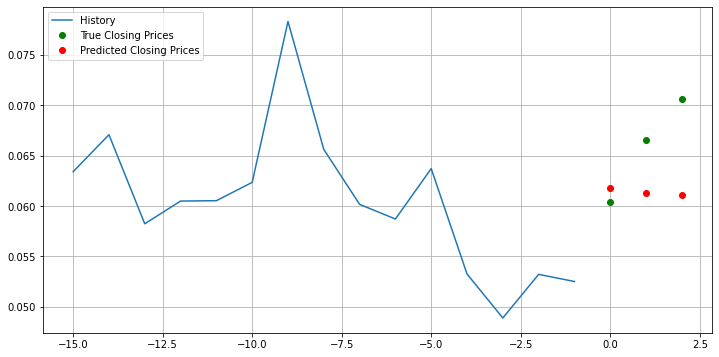

Actual price =[3555.05 3624.55 3573.95], Predicted Price =[3577.77 3566.58 3551.85]


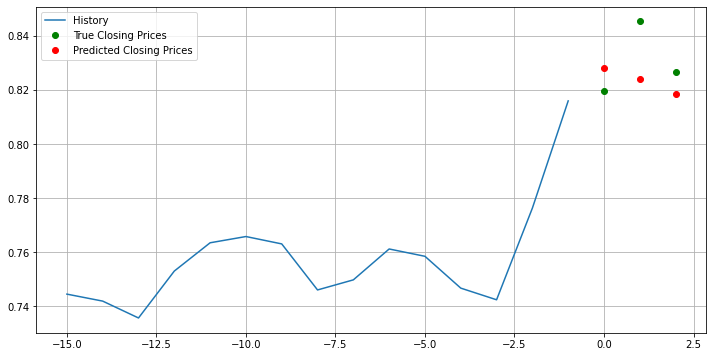

Actual price =[1492.5  1497.4  1479.15], Predicted Price =[1508.72 1507.11 1506.03]


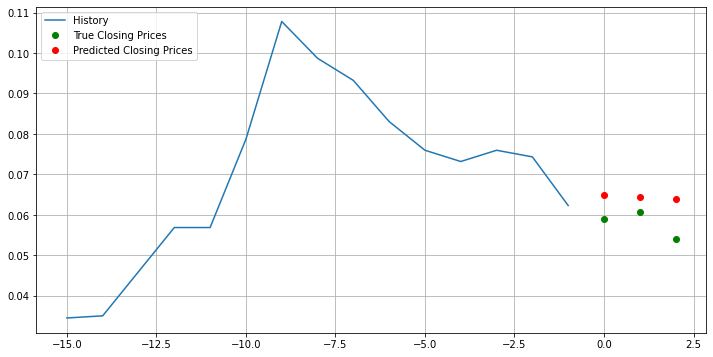

Actual price =[1264.35 1257.75 1290.6 ], Predicted Price =[1277.73 1275.62 1276.12]


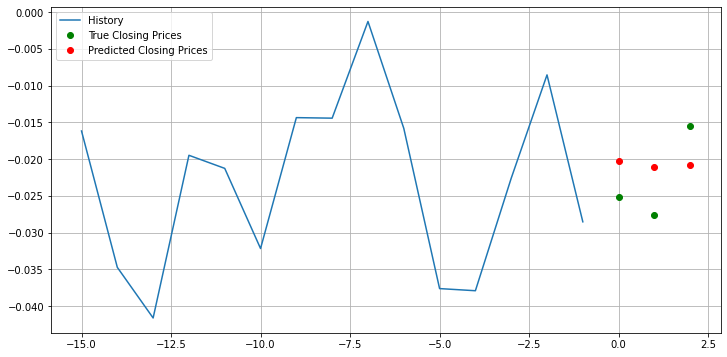

Actual price =[2780.6  2773.6  2747.15], Predicted Price =[2800.94 2794.8  2783.95]


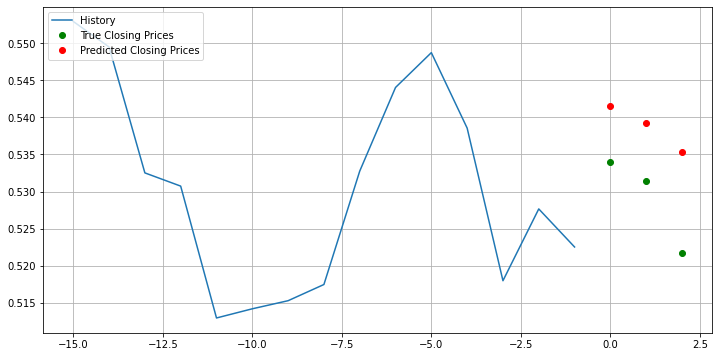

Actual price =[557.2 549.8 558.7], Predicted Price =[564.25 560.35 565.31]


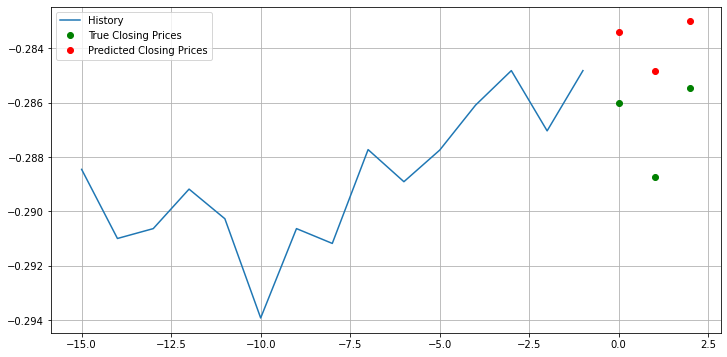

Actual price =[542.35 537.35 532.4 ], Predicted Price =[545.69 542.63 546.92]


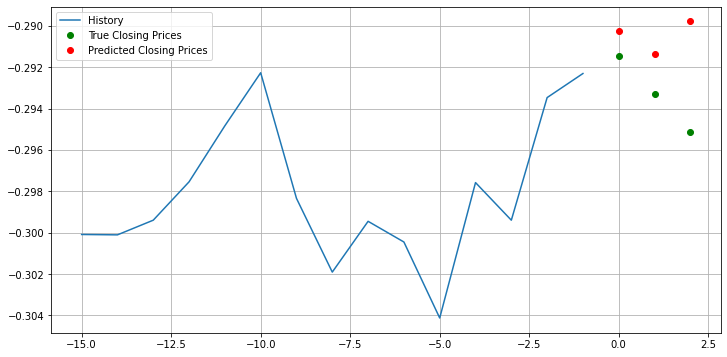

Actual price =[1264.2  1266.75 1310.65], Predicted Price =[1282.54 1280.05 1281.08]


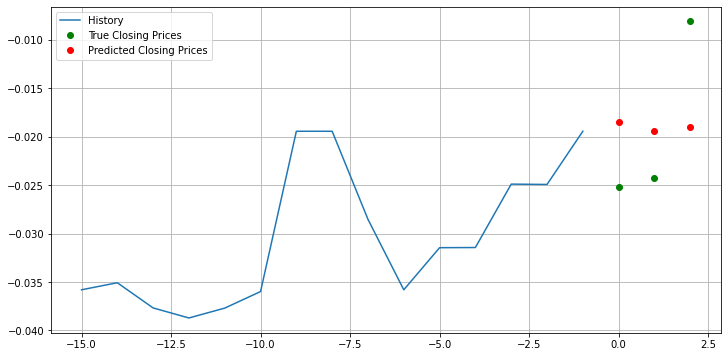

Actual price =[2884.6  3152.15 3128.45], Predicted Price =[2884.85 2877.52 2865.93]


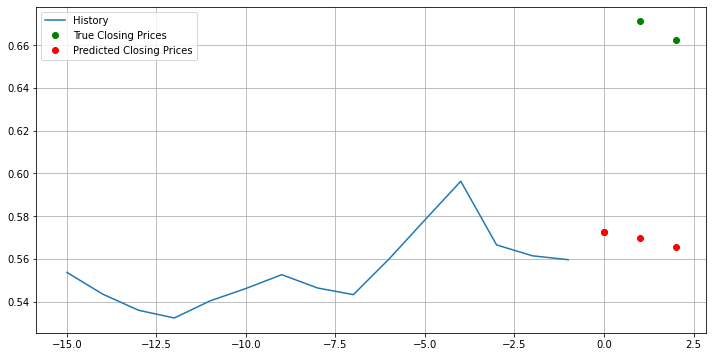

In [ ]:
idx =np.random.randint(0,4800,10)
for x, y in zip(x_test3[idx], y_test3[idx]):
  pred = model.predict(x.reshape(1,15,6))[0]
  actual_price = np.round((y*std_values[4]) + mean_values[4] , 2)
  predicted_price = np.round((pred*std_values[4]) + mean_values[4] , 2)
  print('Actual price ={}, Predicted Price ={}'.format(actual_price, predicted_price))
  multi_step_plot(x, y, pred)